## Model Training and Evaluation

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Definitions Needed

In [3]:
def load_and_preprocess_data(symbol):
    data = pd.read_csv(f'../data/intraday/{symbol}_intraday.csv')
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    data['close_normalized'] = (data['4. close'] - data['4. close'].mean()) / data['4. close'].std()
    data['close_lagged_1'] = data['4. close'].shift(1)
    data['close_lagged_2'] = data['4. close'].shift(2)
    data['close_lagged_3'] = data['4. close'].shift(3)
    data.dropna(inplace=True)
    return data

features = ['1. open', '2. high', '3. low', '4. close', '5. volume', 'close_lagged_1', 'close_lagged_2', 'close_lagged_3']
target = '4. close'

### Load Combined Data

In [5]:
data = pd.read_csv('../data/combined_data.csv', parse_dates=['date'])
data.set_index('date', inplace=True)

### Train-Test Split

In [7]:
# Leave out one company's data (e.g., 'TSLA') for testing
test_symbol = 'TSLA'
test_data = load_and_preprocess_data(test_symbol)

X_train = data[data['symbol'] != test_symbol][features]
y_train = data[data['symbol'] != test_symbol][target]

X_test = test_data[features]
y_test = test_data[target]

### Train Models

In [8]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train, y_train)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

### Evaluate Models

Linear Regression (TSLA) - MSE: 7.657610463482314e-25, R^2: 1.0
Decision Tree (TSLA) - MSE: 0.009597126128808043, R^2: 0.9988500175320791
Random Forest (TSLA) - MSE: 0.0019265850494096359, R^2: 0.9997691455754522
Gradient Boosting (TSLA) - MSE: 0.019267897746194477, R^2: 0.9976912104410817


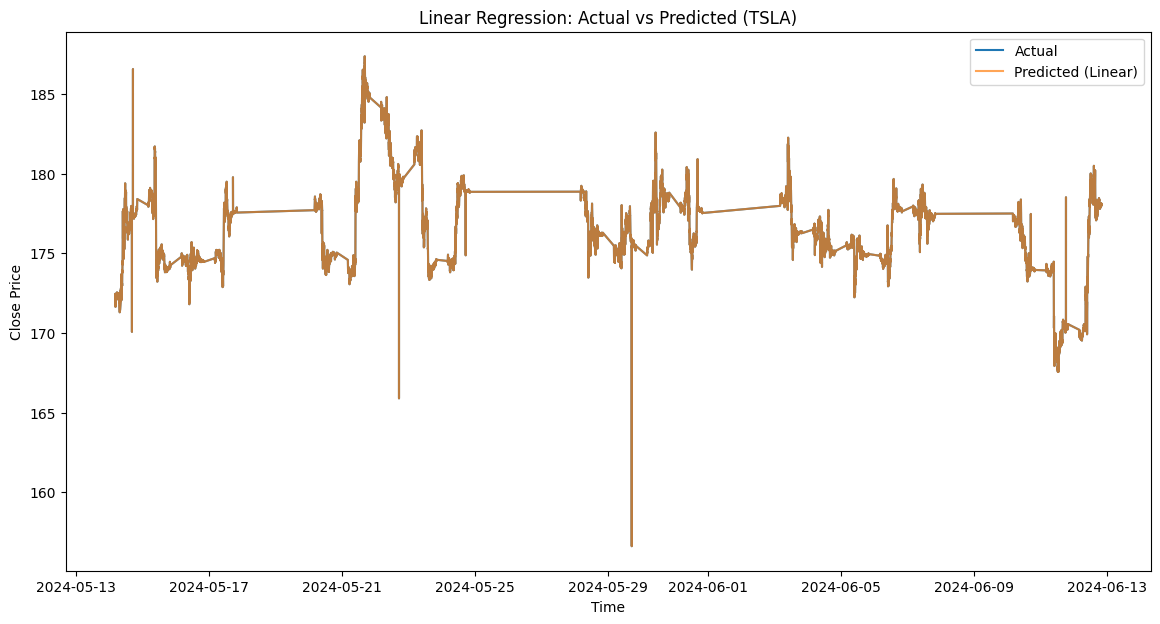

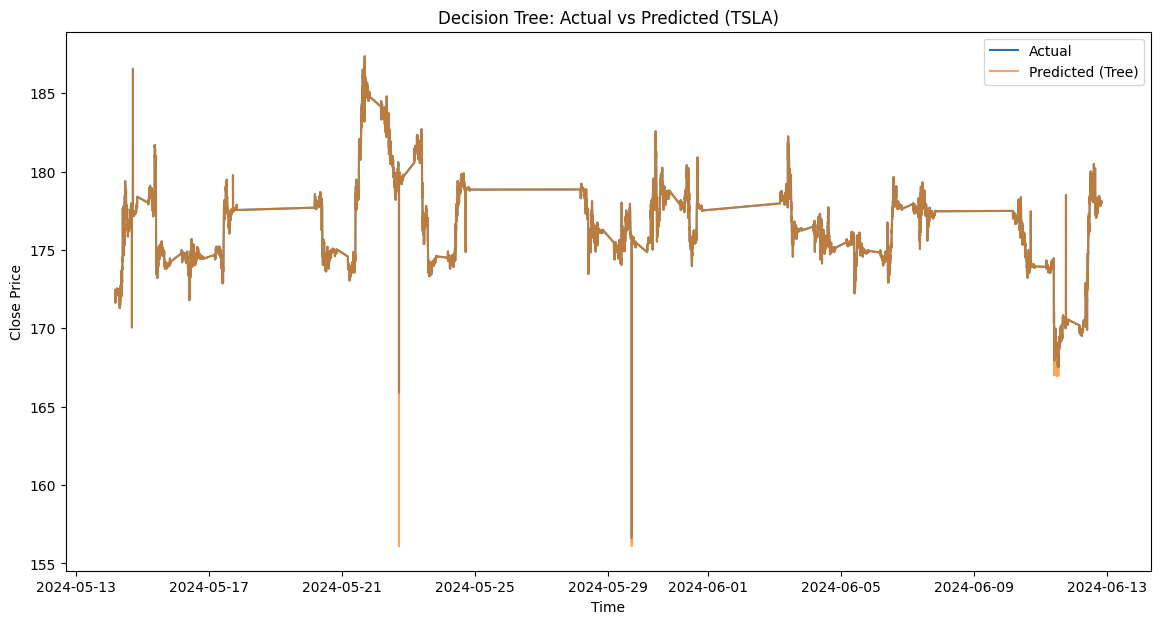

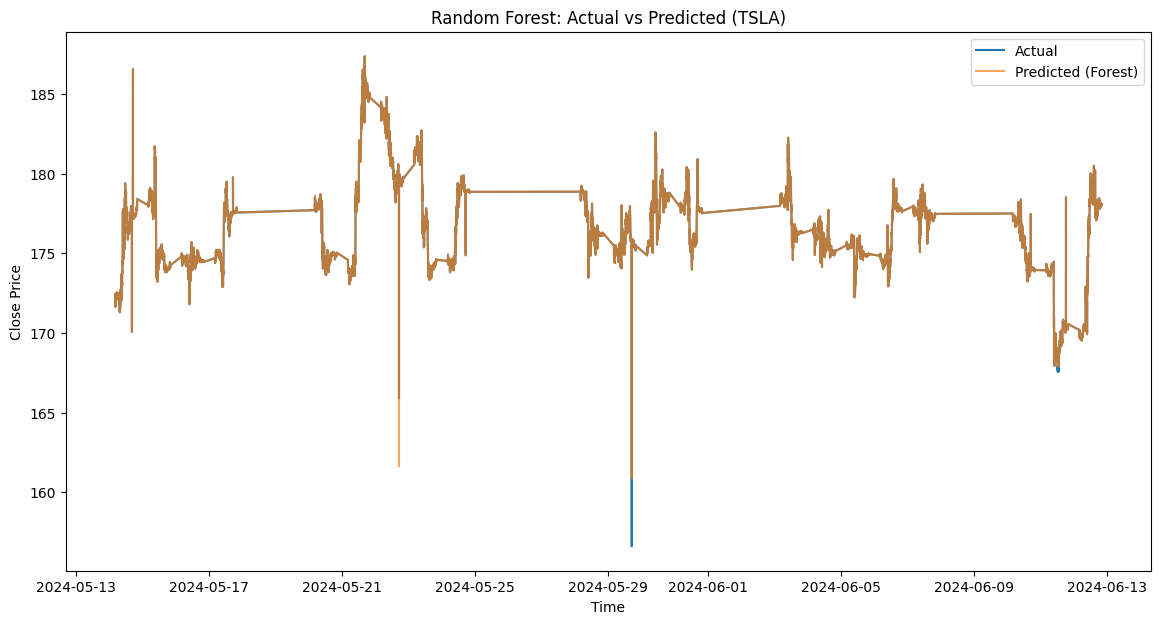

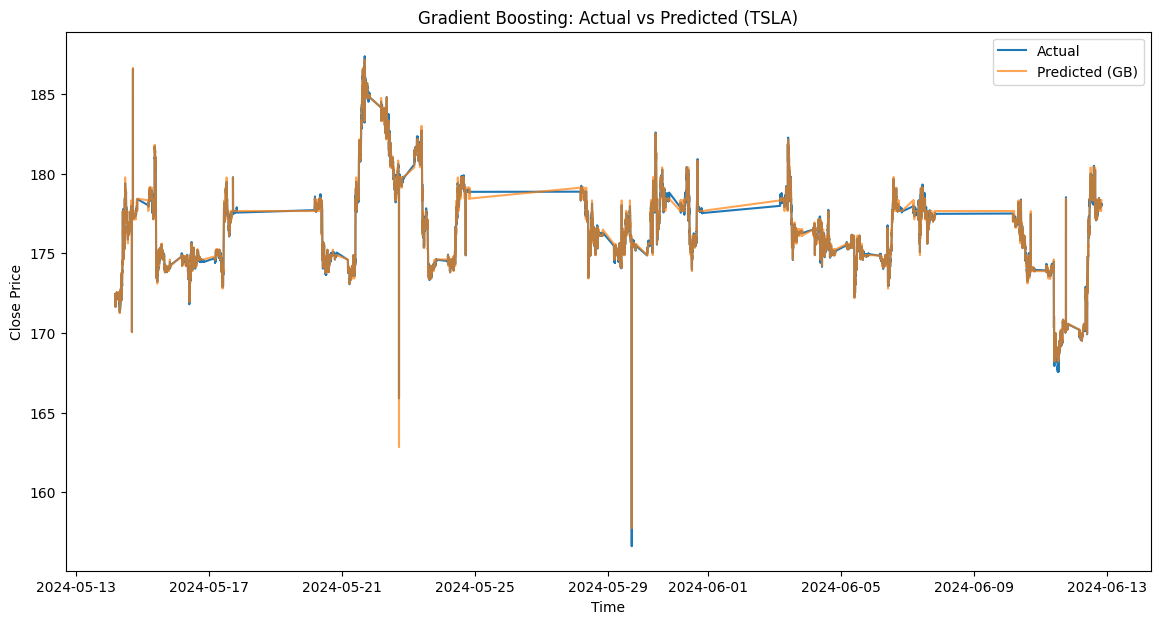

In [9]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

mse_linear, r2_linear, y_pred_linear = evaluate_model(linear_model, X_test, y_test)
mse_tree, r2_tree, y_pred_tree = evaluate_model(tree_model, X_test, y_test)
mse_forest, r2_forest, y_pred_forest = evaluate_model(forest_model, X_test, y_test)
mse_gb, r2_gb, y_pred_gb = evaluate_model(gb_model, X_test, y_test)

print(f"Linear Regression (TSLA) - MSE: {mse_linear}, R^2: {r2_linear}")
print(f"Decision Tree (TSLA) - MSE: {mse_tree}, R^2: {r2_tree}")
print(f"Random Forest (TSLA) - MSE: {mse_forest}, R^2: {r2_forest}")
print(f"Gradient Boosting (TSLA) - MSE: {mse_gb}, R^2: {r2_gb}")

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_linear, label='Predicted (Linear)', alpha=0.7)
plt.title('Linear Regression: Actual vs Predicted (TSLA)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_tree, label='Predicted (Tree)', alpha=0.7)
plt.title('Decision Tree: Actual vs Predicted (TSLA)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_forest, label='Predicted (Forest)', alpha=0.7)
plt.title('Random Forest: Actual vs Predicted (TSLA)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_gb, label='Predicted (GB)', alpha=0.7)
plt.title('Gradient Boosting: Actual vs Predicted (TSLA)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()